## Week 2 Project 1:
## CUNY MSDS DATA620 - Web Analytics
---
### Team5: Christopher Estevez, Meaghan Burke, Rickidon Singh,  Ritesh Lohiya, Rose Koh
### 06/25/2018 (due date)
##### python version: 2.7
---

## Degree and Eigenvector centrality

For your first project, you are asked to

    1.	Identify and load a network dataset that has some categorical information available for each node.
	2.	For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
	3.	Compare your centrality measures across your categorical groups.

For example, using the dataset from a study of romantic relationships among high school students in Columbus, Ohio [http://researchnews.osu.edu/archive/chains.html], you might want to determine if there are any differences in your calculated centrality measures between the two sexes.  You might use a t-test or another statistical measure to support your findings.

You may work in a small group.  Your project should be delivered in an IPython Notebook, and posted in GitHub.  Your project is due end of day Monday 6/25. You and your team should created a video presentation about your project. You should be ready to present your project in our Meet-up on Tuesday, June 26th. 

## 1. Identify Data:

The group identified data at source: `http://www-personal.umich.edu/~mejn/netdata/`.

The **Books about US politics** dataset has the capacity for centrality metrics as well as a good amount of categorical data for nodes.

Each nodes has value of `l,n,c` which is `liberal, neutral, conservative`


## 2. Calculate degree centrality and eigenvector centrality.

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('fivethirtyeight')
%matplotlib inline

In [2]:
G = nx.read_gml("data/polbooks/polbooks.gml")

In [3]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 105
Number of edges: 441
Average degree:   8.4000


In [4]:
nx.diameter(G)

7

In [5]:
degree_values =[]
for d in G.degree():
    degree_values.append(d)
degree_centrality = pd.DataFrame(degree_values)
degree_centrality.rename(columns ={0:'Nodes', 1: 'Connection_Num'}, inplace = True)

In [6]:
degree_centrality.sort_values(['Connection_Num'], ascending= False).head(10)

,Nodes,Connection_Num
8,A National Party No More,25
12,Off with Their Heads,25
3,Losing Bin Laden,23
84,Bushwhacked,23
72,American Dynasty,22
66,The Great Unraveling,21
73,Big Lies,21
30,The Price of Loyalty,20
11,Legacy,18
47,Arrogance,18


In [37]:
degree_c = nx.degree_centrality(G)
degree_c_df = pd.DataFrame([degree_c.values()], columns=degree_c.keys())
degree_c_df.sort_values(by=0, ascending=False, axis=1).T

,0
A National Party No More,0.240385
Off with Their Heads,0.240385
Losing Bin Laden,0.221154
Bushwhacked,0.221154
American Dynasty,0.211538
The Great Unraveling,0.201923
Big Lies,0.201923
The Price of Loyalty,0.192308
Legacy,0.173077
Arrogance,0.173077


In [38]:
eigenvector_c = nx.eigenvector_centrality_numpy(G)
eigen_c_df = pd.DataFrame([eigenvector_c.values()], columns=eigenvector_c.keys())
eigen_c_df.sort_values(by=0, ascending=False, axis=1).T

,0
Bushwhacked,0.296946
Big Lies,0.284135
American Dynasty,0.270838
The Price of Loyalty,0.258594
The Great Unraveling,0.254886
The Lies of George W. Bush,0.241950
Worse Than Watergate,0.237598
Plan of Attack,0.198185
Lies and the Lying Liars Who Tell Them,0.189236
Against All Enemies,0.186726


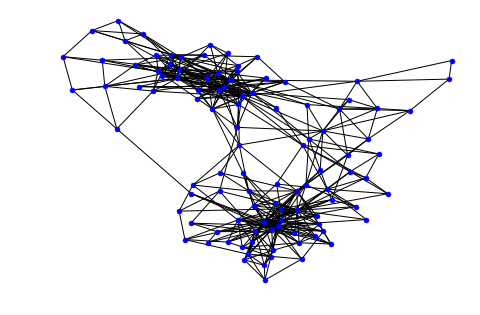

In [42]:
nx.draw(G, with_labels = False, node_size = 25, node_color = 'blue')
plt.show()
plt.savefig("graph.png", dpi=500)